**imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Validation**

In [138]:
df = pd.read_csv(r'C:\Users\Bank\Desktop\tawfiq\bank.csv')

In [139]:
df.head(7).T

,0,1,2,3,4,5,6
age,59,56,41,55,54,42,56
job,Farmers,Farmers,technician,services,Farmers,management,management
marital,married,married,married,married,married,single,married
education,secondary,secondary,secondary,secondary,tertiary,tertiary,tertiary
default,no,no,no,no,no,no,no
balance,234300,4500,127000,247600,18400,0,83000
Yearly income,234567.0,307600.0,500000.0,234000.0,327600.0,216500.0,222600.0
Number of Children,0,4,0,3,1,0,2
housing,yes,no,yes,yes,no,yes,yes
loan,no,no,no,no,no,yes,yes


In [140]:
df.tail(5).T

,11155,11156,11157,11158,11159
age,35,34,33,39,32
job,blue-collar,blue-collar,blue-collar,services,technician
marital,married,single,single,married,single
education,secondary,secondary,primary,secondary,secondary
default,no,no,no,no,no
balance,8000,-720,100,73300,2900
Yearly income,89840.0,8085.6,1123.0,82315.0,32567.0
Number of Children,2,0,0,0,0
housing,yes,yes,yes,no,no
loan,yes,no,no,no,no


In [141]:
### Loaded Successfully, no error

<center><b>Basic EDA</b></center>

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11160 non-null  int64  
 1   job                 11160 non-null  object 
 2   marital             11160 non-null  object 
 3   education           11160 non-null  object 
 4   default             11160 non-null  object 
 5   balance             11160 non-null  int64  
 6   Yearly income       11160 non-null  float64
 7   Number of Children  11160 non-null  int64  
 8   housing             11160 non-null  object 
 9   loan                11160 non-null  object 
 10  contact             11160 non-null  object 
 11  day                 11160 non-null  int64  
 12  month               11160 non-null  object 
 13  duration            11160 non-null  int64  
 14  campaign            11160 non-null  int64  
 15  pdays               11160 non-null  int64  
 16  prev

In [143]:
### Convert to float32 - 5   balance 11160 non-null int64 | Yearly income 11160 non-null  float64
### Convert all int64 -> int32
### Fromat column name

In [144]:
new_cols = [name.lower().replace(' ', '_') for name in df.columns]
new_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'yearly_income_',
 'number_of_children',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [145]:
data = df.copy()

In [146]:
data.columns = new_cols
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'yearly_income_', 'number_of_children', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [147]:
# check missing values

In [148]:
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance               0
yearly_income_        0
number_of_children    0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit               0
dtype: int64

In [149]:
### no missing values found

In [150]:
data["deposit"].value_counts()

no     5871
yes    5289
Name: deposit, dtype: int64

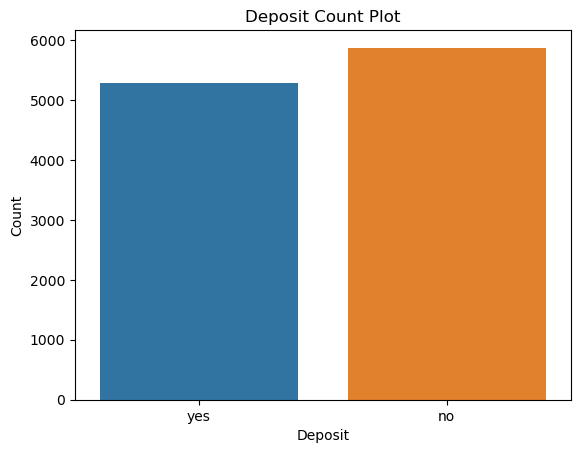

In [151]:
# count plot for deposit   
sns.countplot(data=data, x='deposit')
plt.title('Deposit Count Plot')  # Optional: Set the title
plt.xlabel('Deposit')            # Optional: Set the x-axis label
plt.ylabel('Count')             # Optional: Set the y-axis label
plt.show()

In [152]:
# The dataset is fairly balanced 

**Qualitative/Categorical Analysis**

In [153]:
data.select_dtypes('object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,Farmers,married,secondary,no,yes,no,unknown,may,unknown,yes
1,Farmers,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,Farmers,married,tertiary,no,no,no,unknown,may,unknown,yes


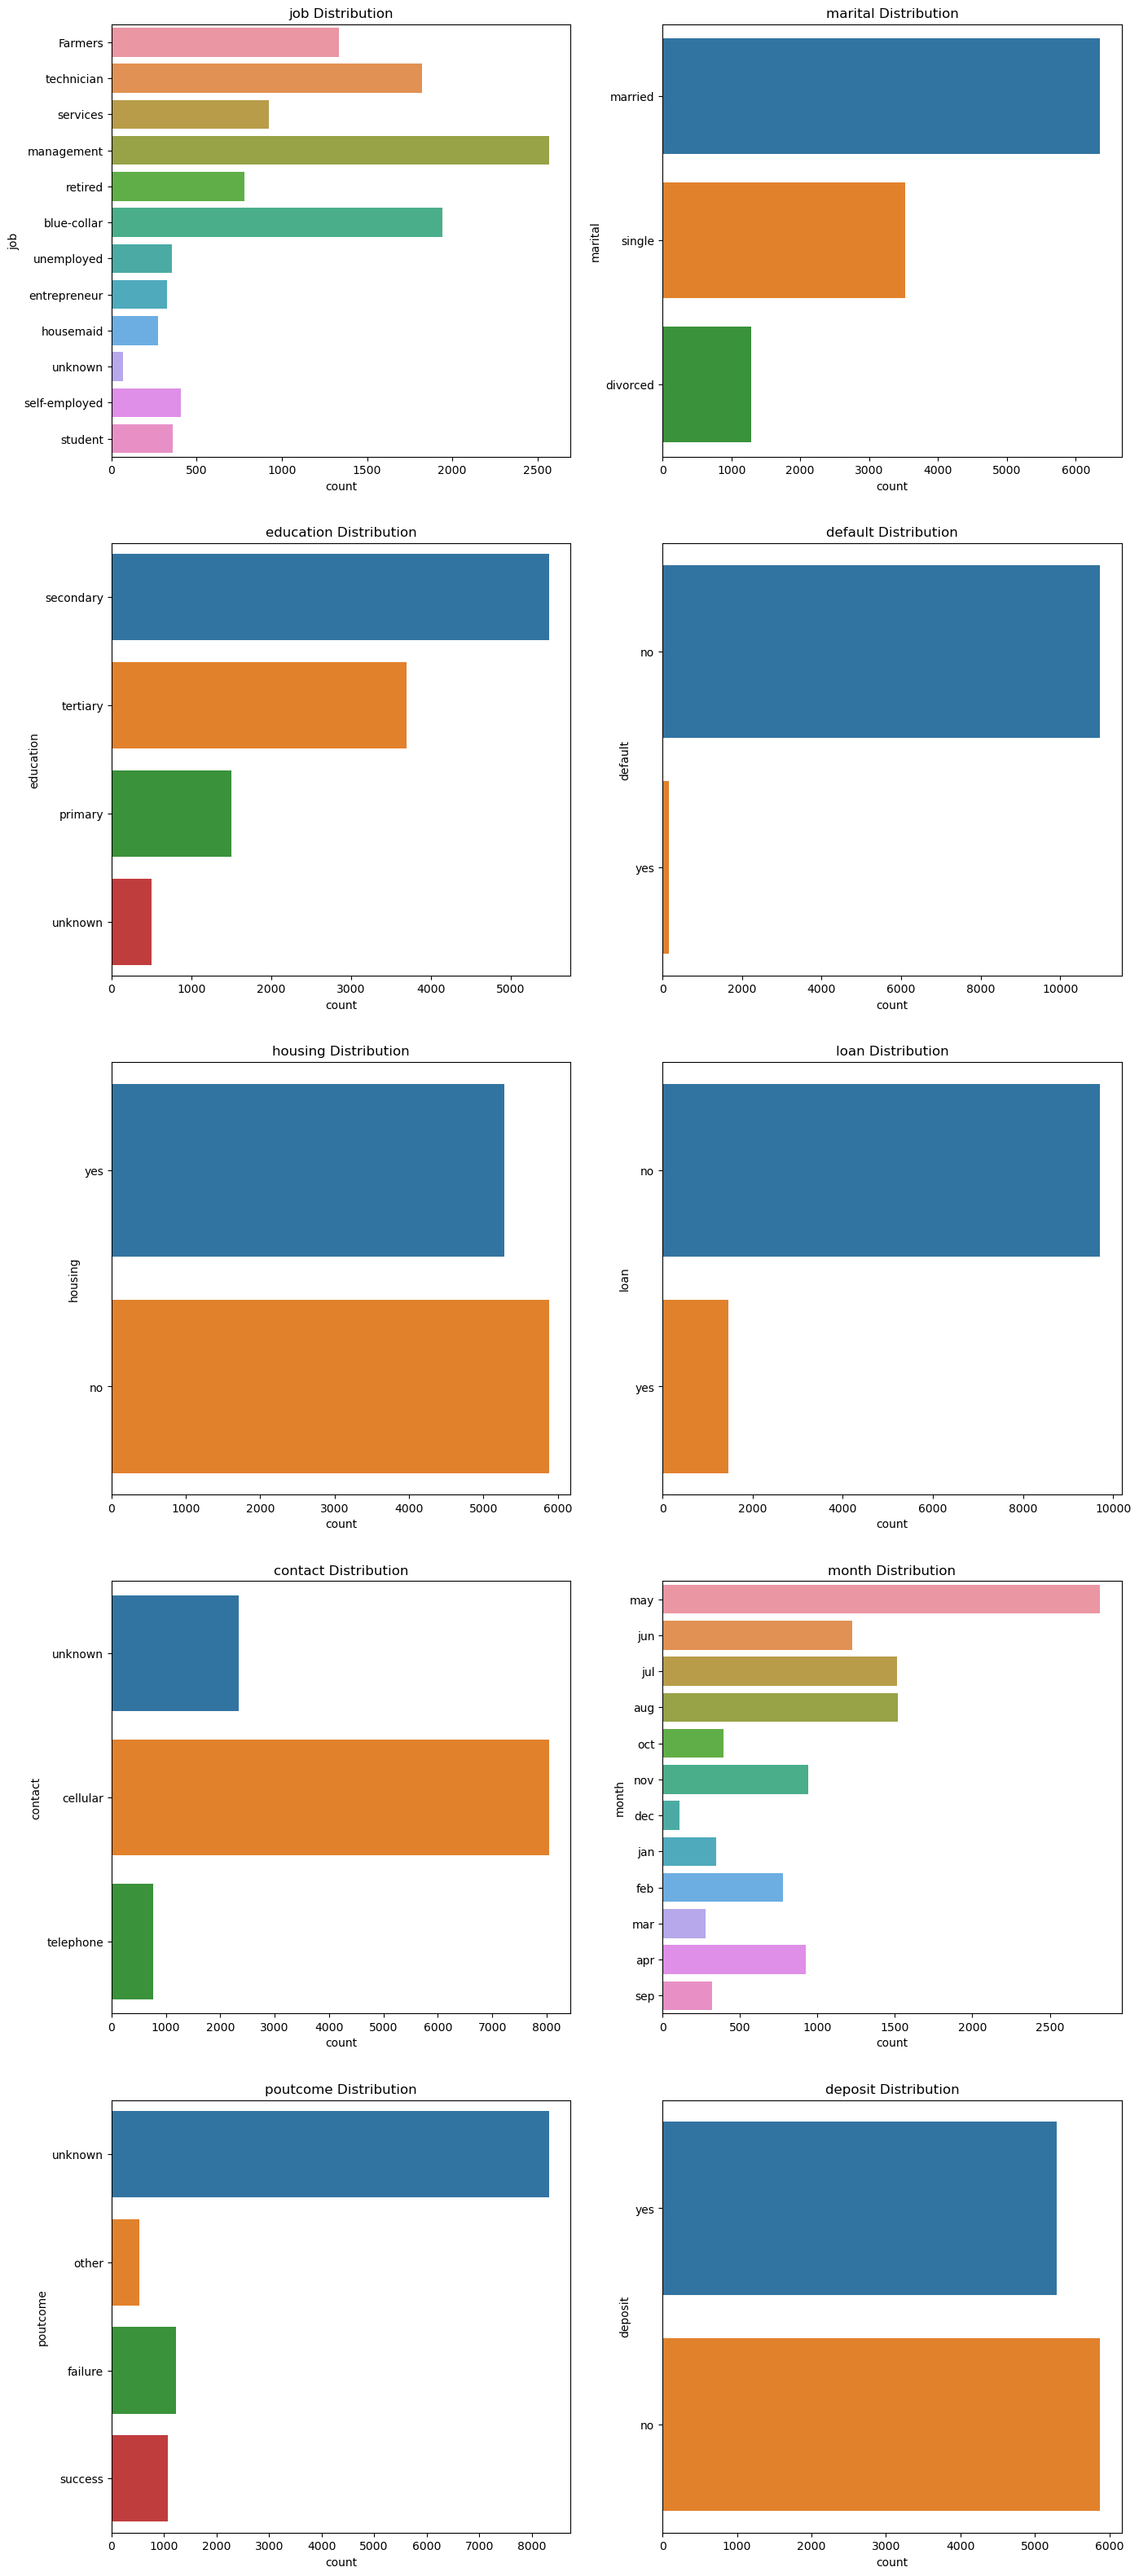

In [154]:
cols = data.select_dtypes('object').head().columns

fig, grid = plt.subplots(5, 2, figsize=(16, 40))
index = 0
for row in range(5):
    for col in range(2):
        feature = cols[index]
        index = index + 1
        sns.countplot(data=data, y=data[feature], ax=grid[row, col])
        grid[row, col].set_title(f"{feature} Distribution")
plt.show()

In [155]:
### 

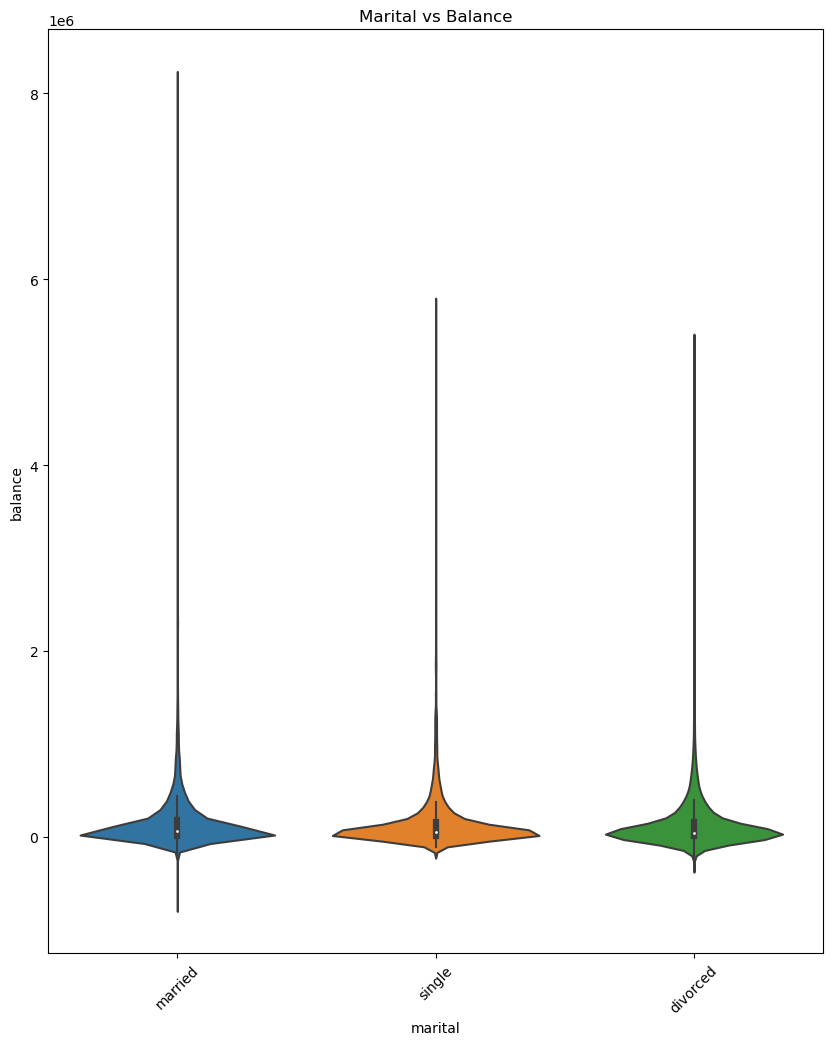

In [156]:
# Multivariate analysis using box plots
plt.figure(figsize=(10, 12))
sns.violinplot(data=data, x='marital', y='balance')
plt.title('Marital vs Balance')
plt.xticks(rotation=45)
plt.show()


In [157]:
## comaparitively balance has deacreasing order - primay , secondary, Tertiary, Unknown

In [158]:
data.groupby(by='education').agg({'balance':['mean', 'median']})

balance         
                    mean   median
education                        
primary    152323.329333  47200.0
secondary  129716.602484  49450.0
tertiary   184590.176200  65800.0
unknown    174787.505030  69400.0

In [159]:
 ## comaparitively balance has increasing order - childrlen 0, , childrlen 1, childrlen 2,childrlen 3,childrlen 4

In [160]:
data.groupby(by='number_of_children').agg({'balance':['mean']})

,balance
,mean
number_of_children,
0,147173.507792
1,149699.840532
2,161431.225080
3,159897.722837
4,159482.663989


In [161]:
## comaparitively balance the customers who have loan  mean bance is low , who have no laon the mean banlance is high 

In [162]:
data.groupby(by='loan').agg({'balance':['mean', 'median']})

balance         
               mean   median
loan                        
no    163465.614267  59800.0
yes    82656.821110  29200.0

In [163]:
#comaparitively balance of customers who have loan default no balance, who are regular loanee the mean banlnce is 1.55 lac above

In [164]:
data.groupby(by='default').agg({'balance':['mean', 'median']})

balance         
                  mean   median
default                        
no       155326.731805  56500.0
yes       -5804.821429      0.0

In [165]:
### comaparitively balance has deacreasing order - married, single, divorced

In [166]:
data.groupby(by='marital').agg({'balance':['mean', 'median']})

balance         
                   mean   median
marital                         
divorced  137241.647332  43900.0
married   160058.444637  58000.0
single    145739.542638  53950.0

In [167]:
##Success count of previous marketing campaign  according to marital status  married > single> divorce 

<Axes: xlabel='poutcome'>

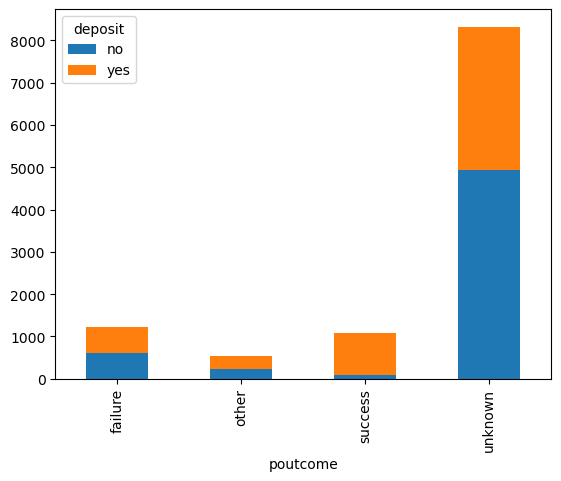

In [168]:
# bar chart for poutcome
types = data.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [169]:
data["previous"].value_counts()

0     8323
1      887
2      693
3      435
4      244
5      164
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

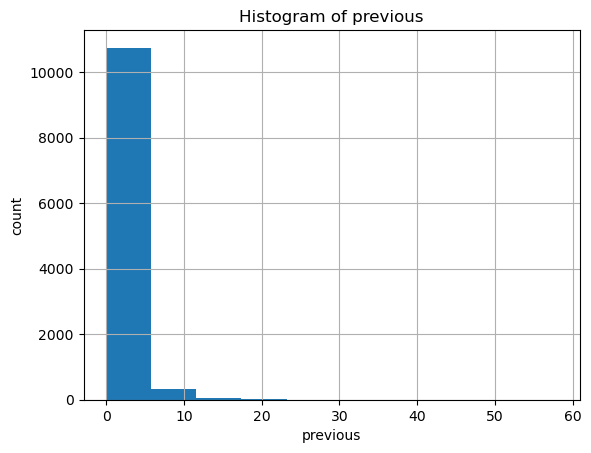

In [170]:
#histogram of previous
data['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

In [171]:
data.loc[data.poutcome=='success',].groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,105
married,593
single,373


In [172]:
## Failur count of  previous marketing campaign count according to marital status  married > single> divorce 

In [173]:
data.loc[data.poutcome=='failure',].groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,113
married,711
single,403


In [174]:
data.loc[data.poutcome=='success',].groupby(by='education').agg({'poutcome':['count']}) /data.groupby(by='education').agg({'poutcome':['count']})

,poutcome
,count
education,
primary,0.058667
secondary,0.087139
tertiary,0.120900
unknown,0.120724


In [175]:
data.loc[data.poutcome=='success',].groupby(by='marital').agg({'poutcome':['count']}) /data.groupby(by='marital').agg({'poutcome':['count']})

,poutcome
,count
marital,
divorced,0.081206
married,0.093401
single,0.106026


In [176]:
data.loc[data.poutcome=='failure',].groupby(by='education').agg({'poutcome':['count']})

,poutcome
,count
education,
primary,134
secondary,620
tertiary,426
unknown,47


In [177]:
##Success count of previous marketing campaign  according to educational  status  secondary > tertiary>primary> unknown 

In [178]:
data.loc[data.poutcome=='success',].groupby(by='education').agg({'poutcome':['count']})

,poutcome
,count
education,
primary,88
secondary,477
tertiary,446
unknown,60


In [179]:
Failure  count of previous marketing campaign  according to educational  status  secondary > tertiary > primary > unknown 

SyntaxError: invalid syntax (1950963682.py, line 1)

In [180]:
data.loc[data.poutcome=='failure',].groupby(by='education').agg({'poutcome':['count']})

,poutcome
,count
education,
primary,134
secondary,620
tertiary,426
unknown,47


In [181]:
##Success  count of previous marketing campaign  according to No. of Children  status  0 > 1 > 2 > 3 > 4 

In [182]:
data.loc[data.poutcome=='success',].groupby(by='number_of_children').agg({'poutcome':['count']})

,poutcome
,count
number_of_children,
0,524
1,139
2,138
3,142
4,128


In [183]:
data["pdays"].value_counts()

-1      8323
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

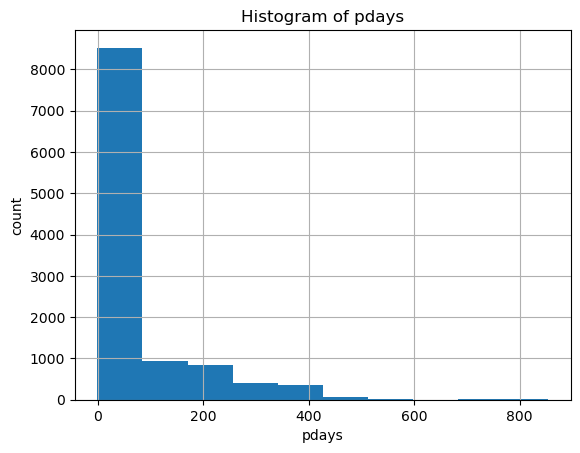

In [184]:
#histogram of previous
data['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

In [185]:
data["campaign"].value_counts()

1     4797
2     3027
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

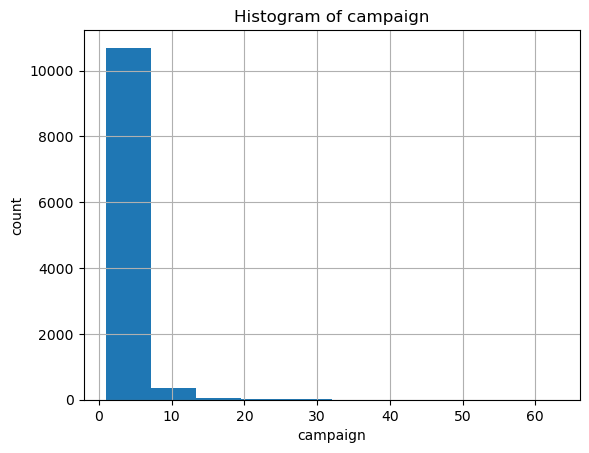

In [186]:
#histogram of previous
data['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

In [187]:
##Campaign : Number of times this client was contacted during this campaign

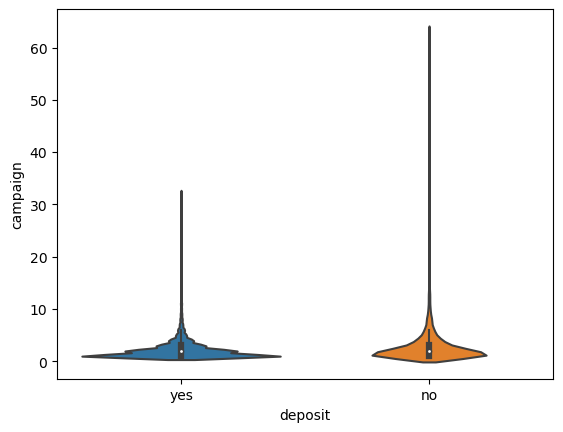

In [188]:
#violin plot for campaign
sns.violinplot(x="deposit", y="campaign", data=data ,size=10)
plt.show()

In [189]:
data["month"].value_counts()

may    2823
aug    1519
jul    1513
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

<Axes: xlabel='month'>

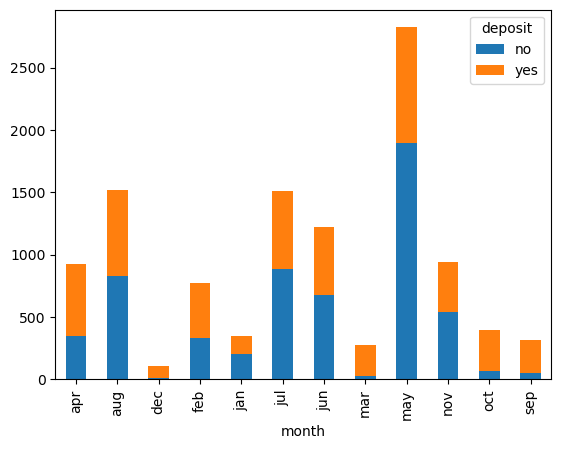

In [190]:
#bar chart for month
types = data.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [191]:
# The month in which the client was contacted. Maximum clients were contacted in May

In [192]:
data["day"].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     418
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     363
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

In [193]:
## Which day of the month was the client contacted. More clients were contacted in the middle of the month.

In [194]:
data["contact"].value_counts()

cellular     8040
unknown      2346
telephone     774
Name: contact, dtype: int64

<Axes: xlabel='contact'>

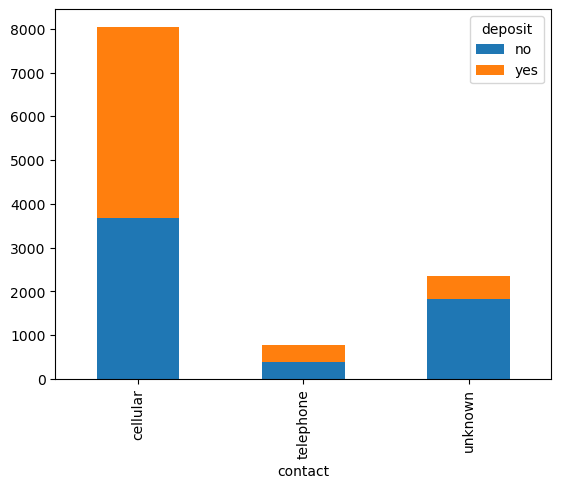

In [195]:
# group by contact to display bar chart
types = data.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [196]:
# Contact : This feature specifies the way of communication. It can be cellular or telephone. Some of them are unknown

In [197]:
data["loan"].value_counts()

no     9701
yes    1459
Name: loan, dtype: int64

<Axes: xlabel='loan'>

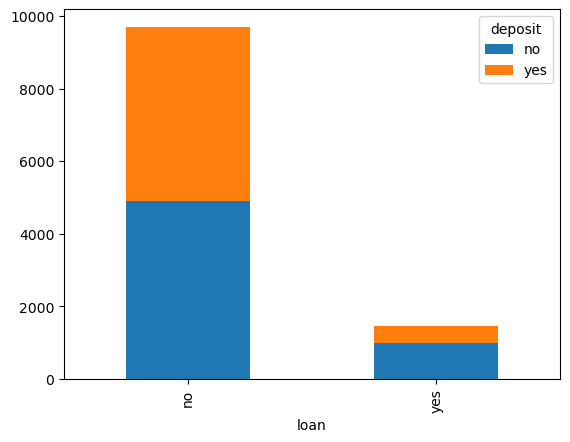

In [198]:
# group by loan to display bar chart
types = data.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [199]:
## Loan : Most of them  don’t  have personal loan in bank

<Axes: xlabel='marital'>

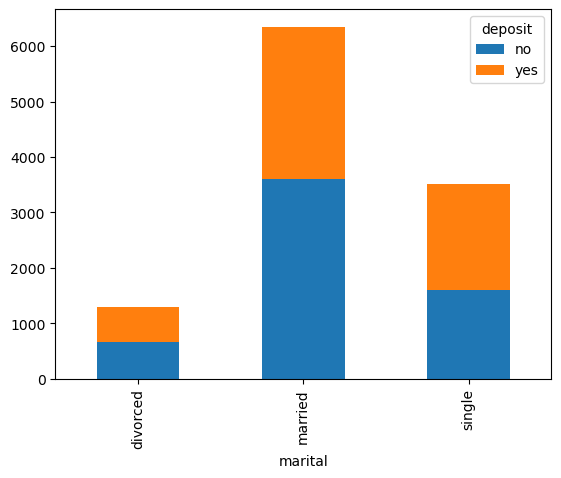

In [200]:
# group by marital to display bar chart
types = data.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [201]:
## Marital : This is a categorical feature. It has 3 categories. Married clients hold the largest portion of this feature

In [202]:
data["default"].value_counts()

no     10992
yes      168
Name: default, dtype: int64

<Axes: xlabel='default'>

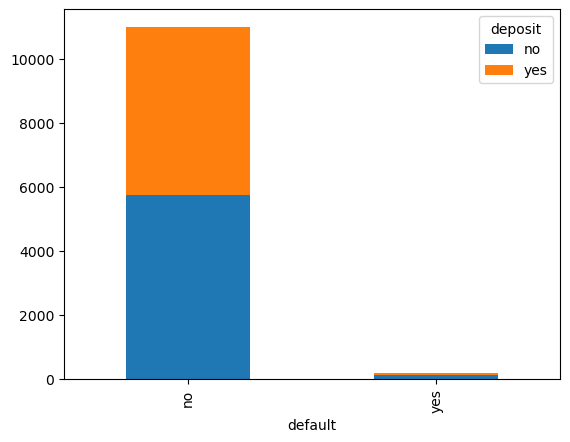

In [203]:
# group by default to display bar chart
types = data.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [204]:
## Default : it tells whether the client has credit in bank or not? Most of them don’t have credit

In [205]:
data["job"].value_counts()

management       2566
blue-collar      1944
technician       1821
Farmers          1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

<Axes: xlabel='job'>

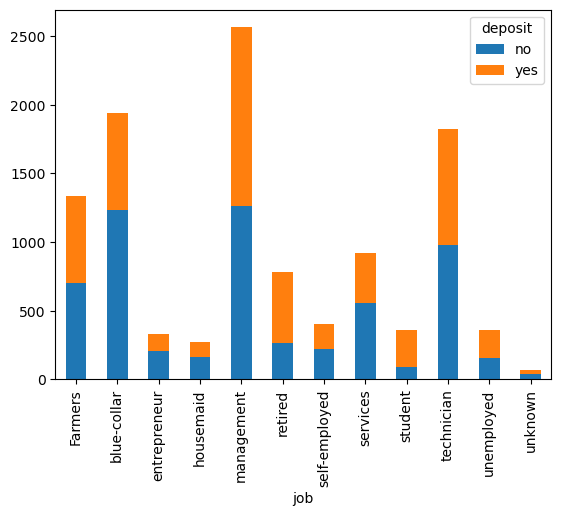

In [206]:
# group by job to display bar chart
types = data.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [207]:
## This is a categorical feature. 12 categories including unknown. The largest clients  belong to management jobs with percentage of 50 while unknown category has least count.

In [208]:
data["education"].value_counts()

secondary    5474
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

<Axes: xlabel='education'>

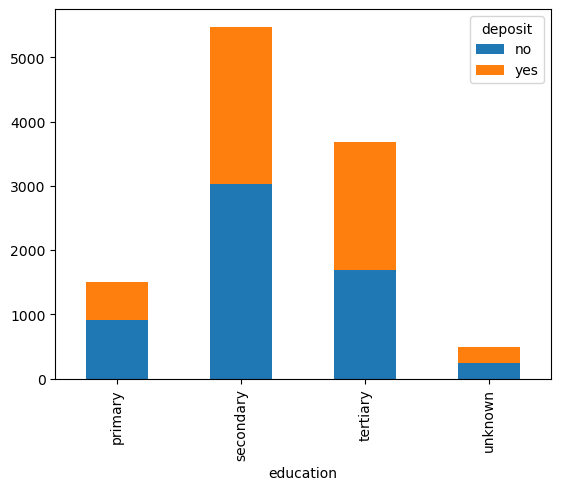

In [209]:
# group by education to display bar chart
types = data.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [210]:
# Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category.

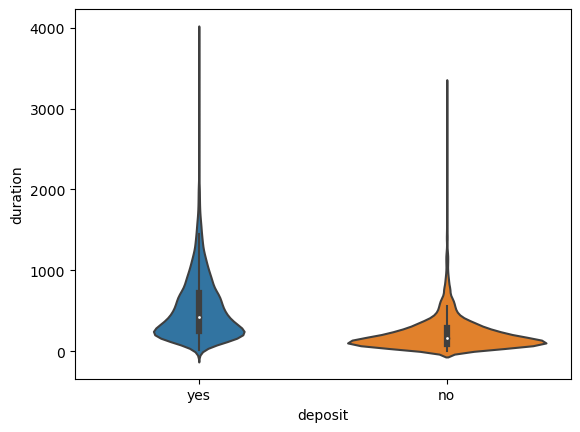

In [211]:
#violin plot for duration
sns.violinplot(x="deposit", y="duration", data=data, size=8)
plt.show()

In [212]:
## Duration : The duration of call in seconds when the client was contacted last time. A histogram is plotted for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.


**Quantitative/Numerical Analysis**

In [213]:
data.select_dtypes(['float64', 'int64'])

,age,balance,yearly_income_,number_of_children,day,duration,campaign,pdays,previous
0,59,234300,234567.0,0,5,1042,1,-1,0
1,56,4500,307600.0,4,5,1467,1,-1,0
2,41,127000,500000.0,0,5,1389,1,-1,0
3,55,247600,234000.0,3,5,579,1,-1,0
4,54,18400,327600.0,1,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...
11155,35,8000,89840.0,2,21,38,2,172,2
11156,34,-720,8085.6,0,7,273,5,-1,0
11157,33,100,1123.0,0,20,257,1,-1,0
11158,39,73300,82315.0,0,16,83,4,-1,0


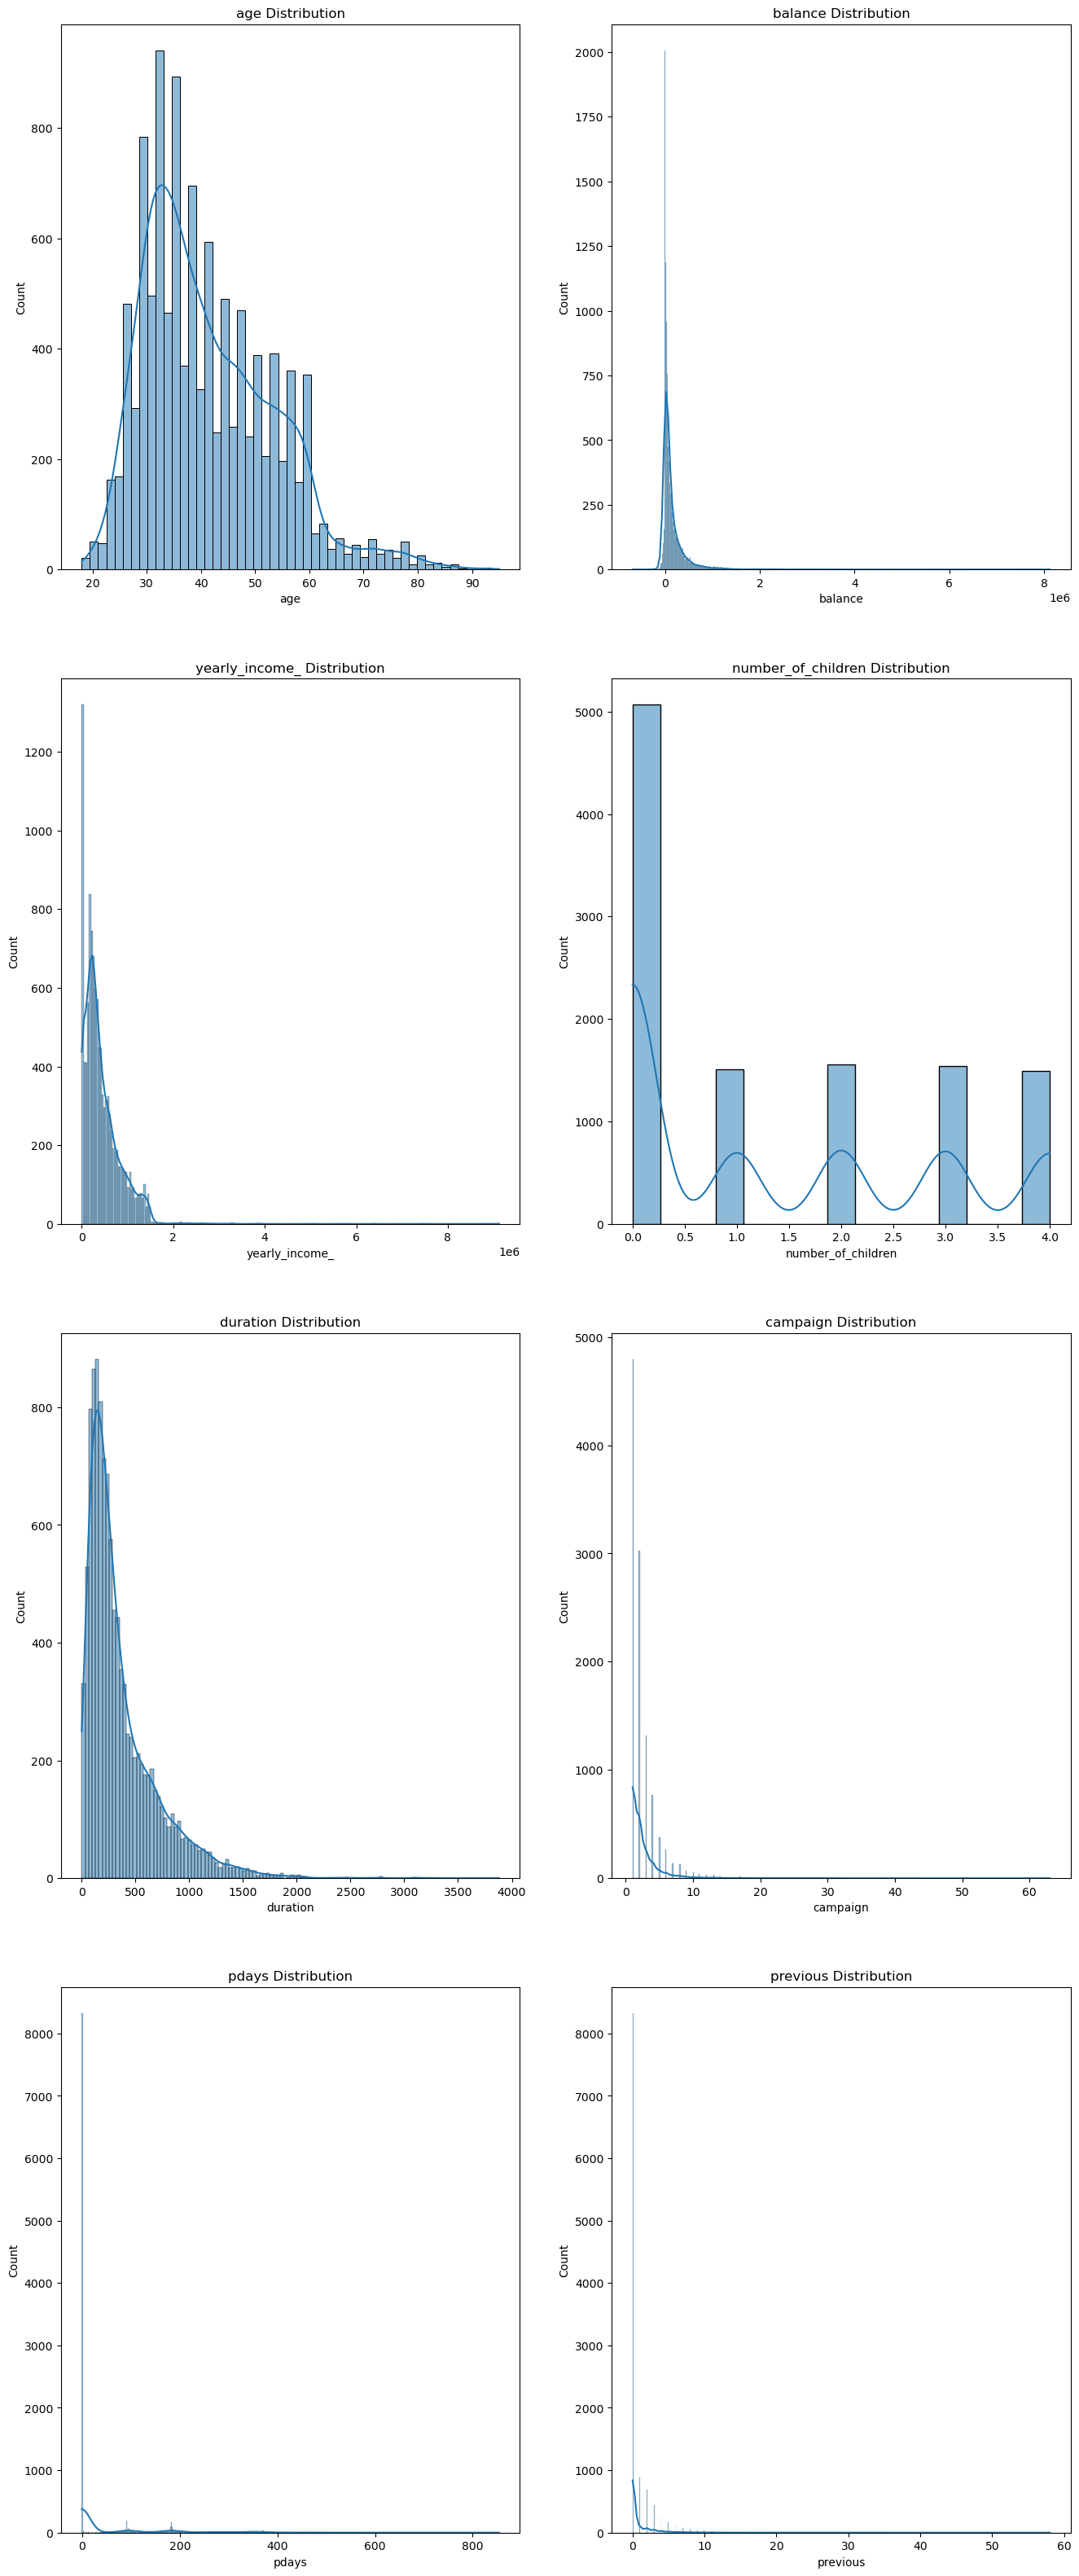

In [214]:
cols = data.select_dtypes(['float64', 'int64']).drop(columns=['day']).columns

fig, grid = plt.subplots(4, 2, figsize=(16, 40))
index = 0
for row in range(4):
    for col in range(2):
        feature = cols[index]
        index = index + 1
        sns.histplot(data=data, x=data[feature], ax=grid[row, col], kde=True)
        grid[row, col].set_title(f"{feature} Distribution")
plt.show()

# Preprocessing

In [215]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
data['deposit'].replace(to_replace='yes', value=1, inplace=True)
data['deposit'].replace(to_replace='no',  value=0, inplace=True)
data['deposit'].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [216]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
data['loan'].replace(to_replace='no', value=1, inplace=True)
data['loan'].replace(to_replace='yes',  value=0, inplace=True)
data.head()

,age,job,marital,education,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,Farmers,married,secondary,no,234300,234567.0,0,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,Farmers,married,secondary,no,4500,307600.0,4,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,127000,500000.0,0,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,247600,234000.0,3,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,Farmers,married,tertiary,no,18400,327600.0,1,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [217]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
data['default'].replace(to_replace='no', value=1, inplace=True)
data['default'].replace(to_replace='yes',  value=0, inplace=True)
data.head()

,age,job,marital,education,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,Farmers,married,secondary,1,234300,234567.0,0,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,Farmers,married,secondary,1,4500,307600.0,4,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,127000,500000.0,0,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,247600,234000.0,3,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,Farmers,married,tertiary,1,18400,327600.0,1,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [218]:
data["loan"].value_counts()

1    9701
0    1459
Name: loan, dtype: int64

In [219]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
data['housing'].replace(to_replace='no', value=1, inplace=True)
data['housing'].replace(to_replace='yes',  value=0, inplace=True)
data.head()

,age,job,marital,education,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,Farmers,married,secondary,1,234300,234567.0,0,0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,Farmers,married,secondary,1,4500,307600.0,4,1,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,127000,500000.0,0,0,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,247600,234000.0,3,0,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,Farmers,married,tertiary,1,18400,327600.0,1,1,1,unknown,5,may,673,2,-1,0,unknown,1


In [220]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(data['marital'])
data = data.drop('marital',axis = 1)
data = data.join(one_hot)

In [221]:
data = data.drop('divorced',axis = 1)

In [222]:
data.head()

,age,job,education,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,59,Farmers,secondary,1,234300,234567.0,0,0,1,unknown,5,may,1042,1,-1,0,unknown,1,1,0
1,56,Farmers,secondary,1,4500,307600.0,4,1,1,unknown,5,may,1467,1,-1,0,unknown,1,1,0
2,41,technician,secondary,1,127000,500000.0,0,0,1,unknown,5,may,1389,1,-1,0,unknown,1,1,0
3,55,services,secondary,1,247600,234000.0,3,0,1,unknown,5,may,579,1,-1,0,unknown,1,1,0
4,54,Farmers,tertiary,1,18400,327600.0,1,1,1,unknown,5,may,673,2,-1,0,unknown,1,1,0


In [224]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(data['education'])
data = data.drop('education',axis = 1)
data = data.join(one_hot)
data = data.drop('unknown',axis = 1)
data.head()

,age,job,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,married,single,primary,secondary,tertiary
0,59,Farmers,1,234300,234567.0,0,0,1,unknown,5,...,1,-1,0,unknown,1,1,0,0,1,0
1,56,Farmers,1,4500,307600.0,4,1,1,unknown,5,...,1,-1,0,unknown,1,1,0,0,1,0
2,41,technician,1,127000,500000.0,0,0,1,unknown,5,...,1,-1,0,unknown,1,1,0,0,1,0
3,55,services,1,247600,234000.0,3,0,1,unknown,5,...,1,-1,0,unknown,1,1,0,0,1,0
4,54,Farmers,1,18400,327600.0,1,1,1,unknown,5,...,2,-1,0,unknown,1,1,0,0,0,1


In [225]:
one_hot = pd.get_dummies(data['job'])
data = data.drop('job',axis = 1)
data = data.join(one_hot)
data = data.drop('unknown',axis = 1)
data.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,contact,day,month,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,1,234300,234567.0,0,0,1,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
1,56,1,4500,307600.0,4,1,1,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
2,41,1,127000,500000.0,0,0,1,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0
3,55,1,247600,234000.0,3,0,1,unknown,5,may,...,0,0,0,0,0,0,1,0,0,0
4,54,1,18400,327600.0,1,1,1,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0


In [226]:
one_hot = pd.get_dummies(data['contact'])
data = data.drop('contact',axis = 1)
data = data.join(one_hot)
data = data.drop('unknown',axis = 1)
data.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,day,month,duration,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,59,1,234300,234567.0,0,0,1,5,may,1042,...,0,0,0,0,0,0,0,0,0,0
1,56,1,4500,307600.0,4,1,1,5,may,1467,...,0,0,0,0,0,0,0,0,0,0
2,41,1,127000,500000.0,0,0,1,5,may,1389,...,0,0,0,0,0,0,1,0,0,0
3,55,1,247600,234000.0,3,0,1,5,may,579,...,0,0,0,0,1,0,0,0,0,0
4,54,1,18400,327600.0,1,1,1,5,may,673,...,0,0,0,0,0,0,0,0,0,0


In [227]:
one_hot = pd.get_dummies(data['month'])
data = data.drop('month',axis = 1)
data = data.join(one_hot)
data = data.drop('dec',axis = 1)
data.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,day,duration,campaign,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,59,1,234300,234567.0,0,0,1,5,1042,1,...,0,0,0,0,0,0,1,0,0,0
1,56,1,4500,307600.0,4,1,1,5,1467,1,...,0,0,0,0,0,0,1,0,0,0
2,41,1,127000,500000.0,0,0,1,5,1389,1,...,0,0,0,0,0,0,1,0,0,0
3,55,1,247600,234000.0,3,0,1,5,579,1,...,0,0,0,0,0,0,1,0,0,0
4,54,1,18400,327600.0,1,1,1,5,673,2,...,0,0,0,0,0,0,1,0,0,0


In [228]:
one_hot = pd.get_dummies(data['poutcome'])
data = data.drop('poutcome',axis = 1)
data = data.join(one_hot)
data = data.drop('other',axis = 1)
data.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,day,duration,campaign,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,59,1,234300,234567.0,0,0,1,5,1042,1,...,0,0,0,1,0,0,0,0,0,1
1,56,1,4500,307600.0,4,1,1,5,1467,1,...,0,0,0,1,0,0,0,0,0,1
2,41,1,127000,500000.0,0,0,1,5,1389,1,...,0,0,0,1,0,0,0,0,0,1
3,55,1,247600,234000.0,3,0,1,5,579,1,...,0,0,0,1,0,0,0,0,0,1
4,54,1,18400,327600.0,1,1,1,5,673,2,...,0,0,0,1,0,0,0,0,0,1


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11160 non-null  int64  
 1   default             11160 non-null  int64  
 2   balance             11160 non-null  int64  
 3   yearly_income_      11160 non-null  float64
 4   number_of_children  11160 non-null  int64  
 5   housing             11160 non-null  int64  
 6   loan                11160 non-null  int64  
 7   day                 11160 non-null  int64  
 8   duration            11160 non-null  int64  
 9   campaign            11160 non-null  int64  
 10  pdays               11160 non-null  int64  
 11  previous            11160 non-null  int64  
 12  deposit             11160 non-null  int64  
 13  married             11160 non-null  uint8  
 14  single              11160 non-null  uint8  
 15  primary             11160 non-null  uint8  
 16  seco

In [ ]:
## **NOTE**All Features are converted to numerical##

In [231]:
tempDF=data['deposit']

In [232]:
data=data.drop('deposit',axis=1)

In [233]:
data['deposit']=tempDF
data.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,day,duration,campaign,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,234300,234567.0,0,0,1,5,1042,1,...,0,0,1,0,0,0,0,0,1,1
1,56,1,4500,307600.0,4,1,1,5,1467,1,...,0,0,1,0,0,0,0,0,1,1
2,41,1,127000,500000.0,0,0,1,5,1389,1,...,0,0,1,0,0,0,0,0,1,1
3,55,1,247600,234000.0,3,0,1,5,579,1,...,0,0,1,0,0,0,0,0,1,1
4,54,1,18400,327600.0,1,1,1,5,673,2,...,0,0,1,0,0,0,0,0,1,1


In [235]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data.drop('deposit',axis=1))
scaled_features=scaler.transform(data.drop('deposit',axis=1))
data_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,age,default,balance,yearly_income_,number_of_children,housing,loan,day,duration,campaign,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491356,0.123628,0.252370,-0.481965,-0.914630,-1.055100,0.38781,-1.265867,1.930167,-0.554194,...,-0.396026,-0.35066,-0.159243,1.7185,-0.303804,-0.190799,-0.171538,-0.351465,-0.325815,0.583559
1,1.239545,0.123628,-0.460103,-0.303816,1.771141,0.947777,0.38781,-1.265867,3.154533,-0.554194,...,-0.396026,-0.35066,-0.159243,1.7185,-0.303804,-0.190799,-0.171538,-0.351465,-0.325815,0.583559
2,-0.019510,0.123628,-0.080304,0.165505,-0.914630,-1.055100,0.38781,-1.265867,2.929826,-0.554194,...,-0.396026,-0.35066,-0.159243,1.7185,-0.303804,-0.190799,-0.171538,-0.351465,-0.325815,0.583559
3,1.155608,0.123628,0.293605,-0.483348,1.099698,-1.055100,0.38781,-1.265867,0.596328,-0.554194,...,-0.396026,-0.35066,-0.159243,1.7185,-0.303804,-0.190799,-0.171538,-0.351465,-0.325815,0.583559
4,1.071671,0.123628,-0.417008,-0.255030,-0.243187,0.947777,0.38781,-1.265867,0.867129,-0.186838,...,-0.396026,-0.35066,-0.159243,1.7185,-0.303804,-0.190799,-0.171538,-0.351465,-0.325815,0.583559


In [236]:
data_feat['deposit']=tempDF

In [237]:
# store standardised data in csv
data_feat.to_csv("standardiseddata.csv")

# Correlation with Class variable 'deposit'

In [238]:
CorrBank=data_feat.drop("deposit", axis=1).apply(lambda x: x.corr(data_feat.deposit))

In [239]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

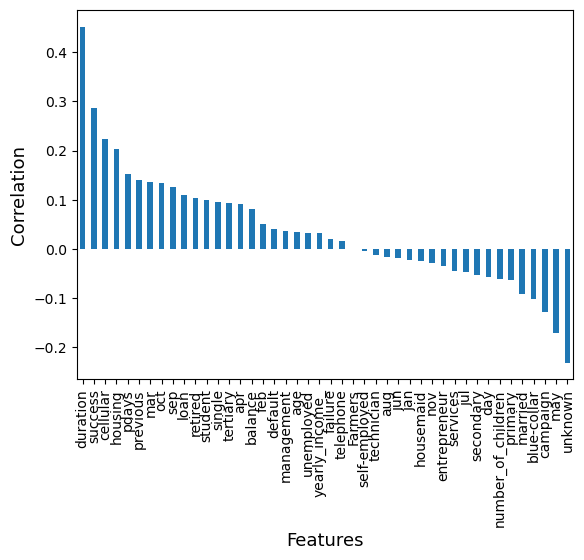

In [241]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=13)
plt.ylabel("Correlation", fontsize=13)


plt.show()

In [ ]:
### Notes :###
1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client. 
2. If the call duration is more , there are higher chances of getting a yes from the client. 
3. It has been sorted in descending order.
4. Succes , cellular, housing, unknown, campaign are also highly correlated
5. Nomber of children, unknown, blue-collar,   is negatively correlated to yes from the client.